In [1]:
# from embedding_torch import *
import embedding_torch as et
import data_loader as dl
# from data_loader import *
import numpy as np
import torch
import importlib

In [2]:
#Set path and device
path = '/home/shazoop/KG-Embeddings/datasets/FB15K-237'
device = torch.device(0)

In [3]:
#Parameters
D_ent = 80
D_rel = 80
max_edges = 30
edge_filter = True
rel_tensor = False

In [4]:
embeddings, ent_id, rel_id, ent_code, rel_code, edge_set = dl.easy_embeddings(path, 'train.txt', D_ent, D_rel, rel_tensor, edge_filter, max_edges)

In [129]:
len(ent_embeddings)

9056

In [5]:
nbd_embeddings, ent_embeddings, rel_embeddings = et.embed_to_device(embeddings, ent_code, rel_code, device)

/home/shazoop/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:83: UserWarning: 
    Found GPU%d %s which is of cuda capability %d.%d.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is %d.%d.
    
  warnings.warn(old_gpu_warn.format(d, name, major, minor, min_arch // 10, min_arch % 10))


In [41]:
edge = list(edge_set['test.txt'])[250]

In [16]:
et.tch_score(edge,ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, rel_tensor= False)

(tensor(0.9902),
 tensor([1.0051, 0.6515, 0.6075, 0.5554, 0.5325, 0.5318, 0.5287, 0.5222, 0.5178,
         0.4969, 0.4864], device='cuda:0', dtype=torch.float64),
 tensor([ 0.1662,  0.5546, -0.7035,  1.8814,  2.3595,  1.1413,  2.4405, -0.4100,
          2.4572,  0.2042]),
 12.92403312343793)

In [20]:
torch.linalg.norm(ent_embeddings[56])

tensor(1., device='cuda:0', dtype=torch.float64)

In [135]:
head, relation ,tail = edge[0], edge[1], edge[2]
head_ix, tail_ix, relation_ix = ent_id[head], ent_id[tail], rel_id[relation]
head_embed, tail_embed, rel_embed = ent_embeddings[head_ix], ent_embeddings[tail_ix], rel_embeddings[relation_ix]
head_nbd = nbd_embeddings[head_ix]
nbd_embed_norel = nbd_embeddings

In [139]:
(val,ix) = torch.topk(coeff,10)


In [105]:
torch.nn.functional.softmax(b, dim = 0)

tensor([0.2185, 0.1027, 0.0886, 0.0883, 0.0881, 0.0876, 0.0824, 0.0817, 0.0815,
        0.0806], device='cuda:0', dtype=torch.float64)

In [97]:
et.test(50, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, edge_set,rel_tensor)

0.26736674023171264

In [31]:
importlib.reload(et)

<module 'embedding_torch' from '/home/shazoop/KG-Embeddings/embedding_torch.py'>

In [18]:
num_batch = 100

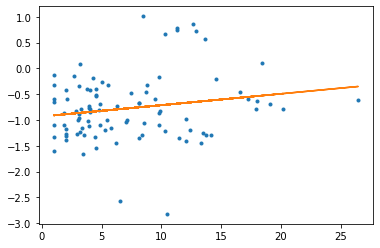

In [19]:
et.batch_plot(num_batch, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 5, edge_set, rel_tensor= False)

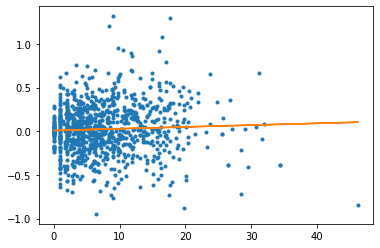

In [256]:
et.batch_plot(num_batch, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 5, edge_set, rel_tensor= False)

In [20]:
num_batch = 700

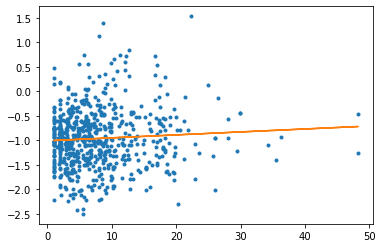

In [21]:
et.batch_plot(num_batch, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, edge_set, norm_threshold = 0., rel_tensor= False)

In [7]:
len(ent_id)

9056

In [122]:
importlib.reload(et)

<module 'embedding_torch' from '/home/shazoop/KG-Embeddings/embedding_torch.py'>

In [56]:
r = et.batch_RR(edge,100, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, rel_tensor= False)

In [80]:
MRR = et.batch_MRR(2, 100, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, edge_set, rel_tensor= False)

In [97]:
MRR = et.batch_MRR_thresh(1000, 100, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, edge_set, threshold = 5., rel_tensor= False)

In [100]:
MRR_100 = MRR


In [126]:
MRR_100

0.12114877657544268

In [115]:
edge = list(edge_set['test.txt'])[250]
r = et.batch_RR(edge,100, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, rel_tensor= False, reverse = True)
r

(1.0, 12.92403312343793)

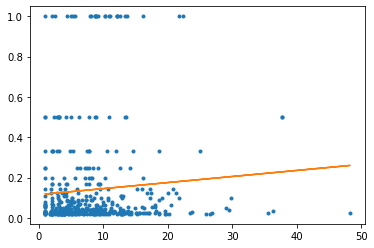

In [105]:
et.RR_plot(500, 50, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 5, edge_set, norm_threshold = 0., rel_tensor= False)

#try log-log

In [101]:
MRR = et.batch_MRR_thresh(1000, 100, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, edge_set, threshold = 5., rel_tensor= False)

In [103]:
MRR_1000 = MRR

# MRR using Reverse Edges

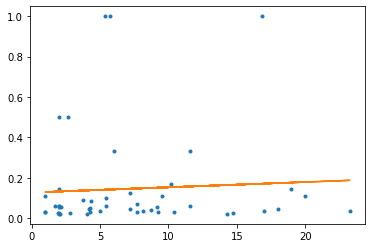

In [117]:
et.RR_plot(500, 50, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 5, edge_set, norm_threshold = 0., rel_tensor= False, reverse = True)

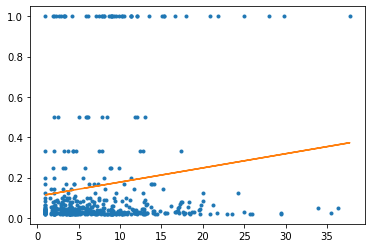

In [128]:
et.RR_plot(500, 50, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 5, edge_set, norm_threshold = 0., rel_tensor= False, reverse = True)

In [130]:
top3 = et.batch_hit(100, 50, ent_embeddings, rel_embeddings, nbd_embeddings, ent_id, rel_id, 10, edge_set, 3, rel_tensor= False, reverse = False)

In [131]:
top3

0.09